In [1]:
#based on pierian_data - Machine Learning course on Udemy

## Logistic Regression using Advertising Data set

This project handles a fake advertising data set and contains some features of user and whether the user clicked on an advertisement. Based on this data using a Logistic Regression model we predict whether the person will click on an advertisement. 

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [3]:
#initially import essential libraries for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid") #sets the background style for seaborn plots

In [4]:
#loading the data from csv file
ad_data = pd.read_csv('advertising.csv')

In [5]:
#check the head(first few rows) of the data
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
#use info to get a good understanding of the data like number of columns
# rows and the data types in each columns
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
#use describe method to get analytical information like mean, standard deviation, minimum, maximum etc. of each column
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

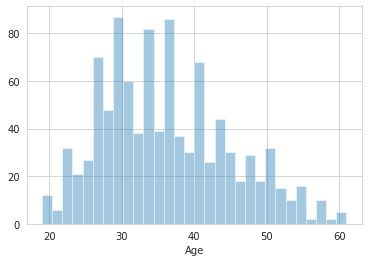

In [8]:
#checking the distribution of age 
sns.distplot(ad_data['Age'],bins=30,kde=False) 

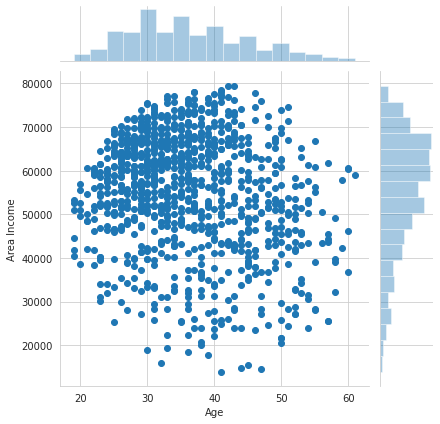

In [9]:
#checking a scatter plot of area income andage
sns.jointplot(y='Area Income', x='Age',data=ad_data)

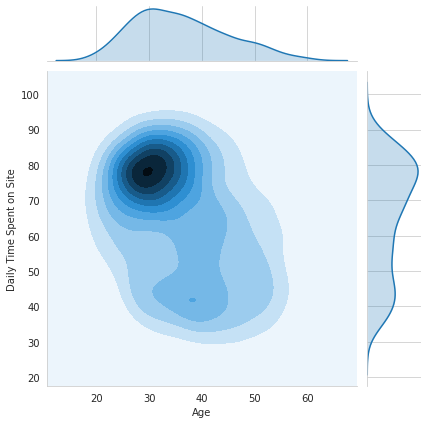

In [10]:
#checking a kde plot of daily time spent and age
sns.jointplot(y='Daily Time Spent on Site',
              x='Age',
              data=ad_data,
              kind='kde')
#seems like people of around age 25-35 spend more time on the site

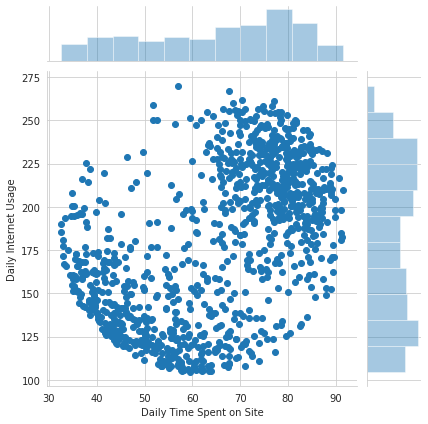

In [11]:
#checking a relation between daily internet usage and daily time spent on site
sns.jointplot(x='Daily Time Spent on Site',
              y='Daily Internet Usage',
              data=ad_data,
              kind='scatter')
#we can see there are two clusters

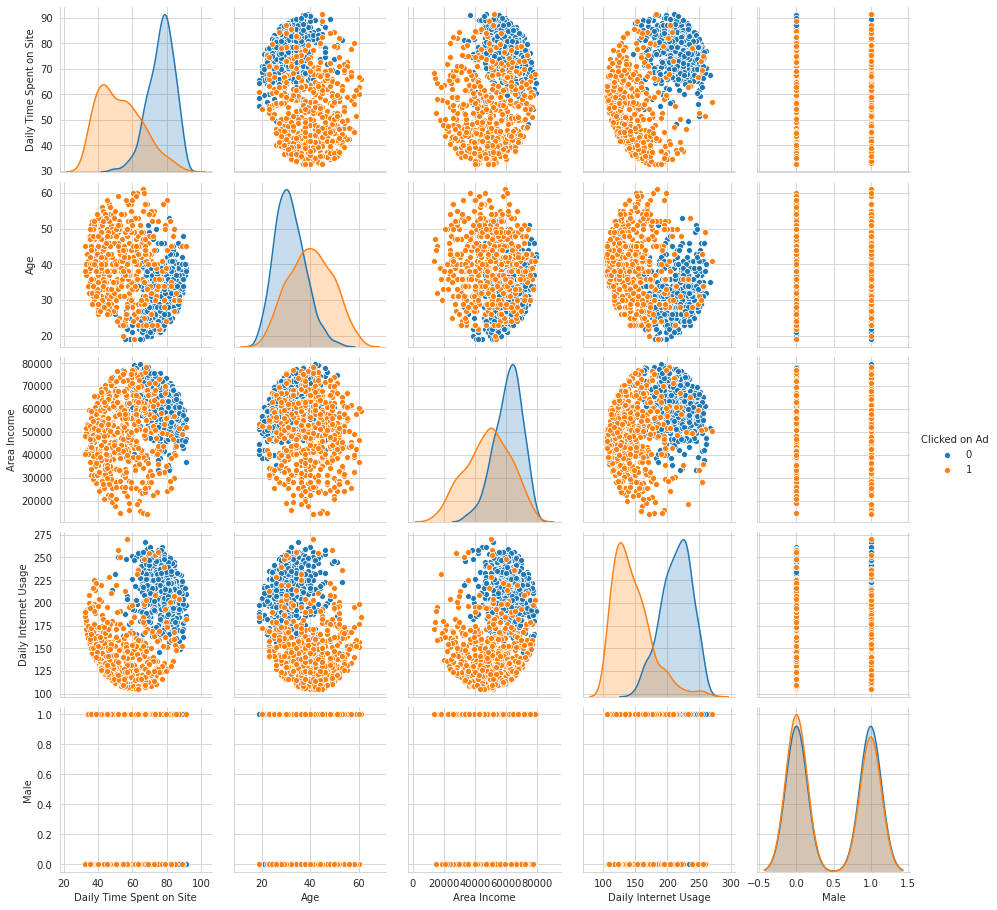

In [12]:
#exploring the above plot further by doing a pair plot with clicked on ad
#(which is our target) as hue
sns.pairplot(data=ad_data,hue='Clicked on Ad')

## Logistic Regression

In [26]:
#initially import essential libraries for logistic regression and analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
ad_data.info() #checking about non neumerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [18]:
#check data type of Timestamp, we can convert this to pandas date time object
type(ad_data['Timestamp'][0])

str

In [19]:
#convert timestamp column to date time objects
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

In [20]:
#verify
type(ad_data['Timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#non neumerical data can be dropped
ad_data.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1, inplace = True)

In [24]:
#verify using head
ad_data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0


In [25]:
## Data train test split

In [32]:
x= ad_data.drop(['Clicked on Ad','Timestamp'],axis=1) # removing target from data for training features
y=ad_data['Clicked on Ad'] #target data(labels)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30, 
                                                    random_state=101)

In [34]:
model = LogisticRegression() #creating an instance of logistic regression model
model.fit(X_train,y_train)   #fit the model with training data and its targets

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
#check how good the model is by predicting on the test set
predictions = model.predict(X_test)

In [36]:
#evaluating the predictions using classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [37]:
#evaluating the predictions using confusion_matrix
print(confusion_matrix(y_test,predictions))

[[149   8]
 [ 14 129]]
